In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

data_path = "../../../data/"
derrom_path = "../../"

import sys

# sys.path.append(derrom_path)
sys.path.insert(0,derrom_path)

import derrom


In [2]:
trajectories = derrom.utils.load_trajectories(filename=data_path + 'trajectories_n_kmax=200.npz')

trajectories = trajectories[::10]

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

100 loaded with n_kmax = 200


In [3]:
rdim = 20

dim_reducer = derrom.dim_reducers.SVD()
# dim_reducer = derrom.dim_reducers.FFT(sorted=True)
# dim_reducer = derrom.dim_reducers.Hermite(sample_max = 1.856, sorted=True, optimize=True, orthogonalize=True, train_rdim=rdim)

model = derrom.utils.reducer_helper_class(dim_reducer)
model.fit(trajectories)

# print(dim_reducer.sample_max)

# print(model.get_error(trajectories[9], rdim=rdim, norm='rms'))

In [4]:
rdim = 20

dim_reducer = derrom.dim_reducers.SVD()
# dim_reducer = derrom.dim_reducers.FFT(sorted=True)
# dim_reducer = derrom.dim_reducers.Hermite(sample_max = 1.856, sorted=True, optimize=True, orthogonalize=True, train_rdim=rdim)

model = derrom.utils.reducer_helper_class(dim_reducer, rdim=rdim)

train_kwargs = {'rdim':rdim}

scores = derrom.utils.get_KFold_CV_scores(model, trajectories, folds=10, seed=817, norms=['rms','max'], train_kwargs=train_kwargs)

print('rms error: ', str(np.mean(scores[0])) + '+-' + str(np.std(scores[0])) )
print('max error: ', str(np.mean(scores[1])) + '+-' + str(np.std(scores[1])) )


rms error:  0.0009668017954528861+-0.0008178586680528447
max error:  0.026518223591377437+-0.03145254782264028


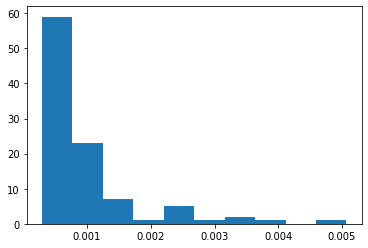

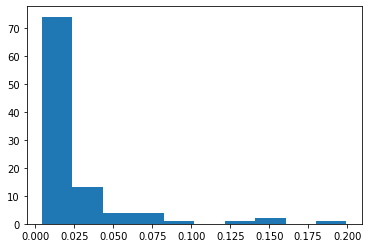

In [5]:
plt.hist(scores[0],bins=n_trajectories//10)
plt.show()

plt.hist(scores[1],bins=n_trajectories//10)
plt.show()